In [2]:
import tensorflow as tf
import numpy as np
import os
from vgg19 import Vgg19_nts
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
styles = ['salvador-dali-painting.jpg', "cafe-terrace-at-night.jpg"]


style = None
parameters = []
for j, st in enumerate(styles):
    for i, ratio in enumerate([8e-5, 5e-4]): 

        print("\nStarting {}---{}---{}---i_j:{}_{}".format(st, ratio, style, i, j))
        parameters.append([st, ratio, style, i, j])

        vv = Vgg19_nts(content_image_path="paris.jpg", style_img_path=st, image_size=224, 
                       ratio_content_to_style=ratio, content_acts=[{"layer_name":"conv4_2", "content_act":0, "w":1}],
                      style_acts = style)

        images = vv.paint(no_of_epochs=800, stack_len=100, sample_rate=8)
        np.save("result_images//{}_{}.npy".format(i, j), images)
np.save("result_images//parameters.npy", parameters)

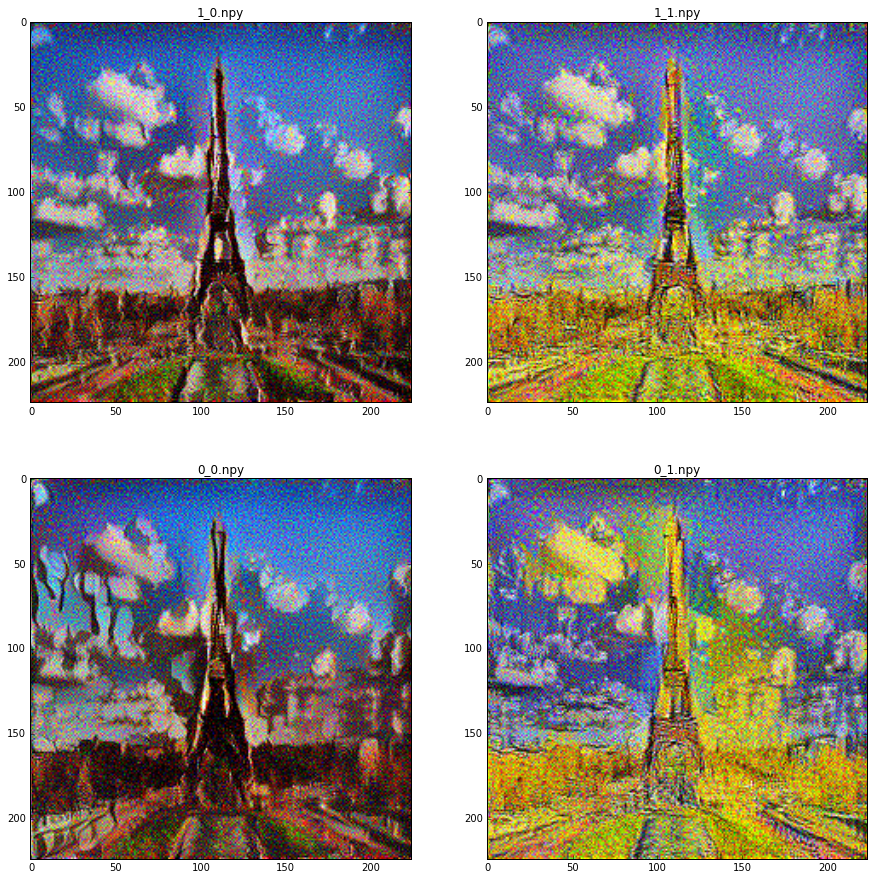

In [3]:
plt.figure(figsize=[15, 15])
files = [f for f in os.listdir("result_images") if not f.startswith("parameters")]
for i in range(len(files)):
    f = np.load("result_images//"+ files[i])
    plt.subplot(2, 2, i+1)
    plt.title(files[i])
    plt.imshow(f[-1].squeeze())
plt.show()